# **importing library**

In [12]:
#importing library
from torch.utils.data import random_split

import os
import pandas as pd
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim
import datetime
import itertools

!pip install optuna


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# **connecting to drive for data**

In [13]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **data check**

In [14]:
import os

# specify your path
path = '/content/drive/MyDrive/KNOT_CODE'

# use listdir() to get list of all files in the directory
files = os.listdir(path)

# use len() to count the number of files
num_files = len(files)

print(f'There are {num_files} files in the directory.')


There are 1152 files in the directory.


In [15]:
import pandas as pd

# specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/prototype1label.csv'  # Replace with your CSV file path

# Read the CSV file using pandas
df = pd.read_csv(csv_file_path)

# Get the number of rows
num_rows = len(df)

print(f'The CSV file has {num_rows} rows.')


The CSV file has 1152 rows.


# **DATASET CLASS**

In [5]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

class CustomDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.df = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        self.resize = transforms.Resize((224, 224))  # Resize to 256x256 pixels

        # Shuffle the data
        self.df = self.df.sample(frac=1, random_state=42).reset_index(drop=True)  # Added random_state for reproducibility

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.df.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')
        image = self.resize(image)  # Resize the image to 256x256 pixels
        label = self.df.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)
        else:
            image = transforms.ToTensor()(image)

        return image, label

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = CustomDataset('/content/drive/MyDrive/prototype1label.csv', '/content/drive/MyDrive/KNOT_CODE', train_transform)

In [16]:
train_dataset[522]

(tensor([[[ 1.3927,  1.3927,  1.3927,  ...,  1.6838,  1.7009,  1.6838],
          [ 1.3927,  1.3927,  1.3927,  ...,  1.7180,  1.7180,  1.7009],
          [ 1.3755,  1.3927,  1.4098,  ...,  1.7009,  1.6838,  1.6838],
          ...,
          [ 1.1015,  1.1187,  1.1015,  ...,  1.3755,  1.3413,  1.3242],
          [ 1.1015,  1.1015,  1.0844,  ...,  1.3927,  1.4098,  1.4098],
          [ 1.1358,  1.1187,  1.1187,  ...,  1.4098,  1.4098,  1.4098]],
 
         [[-0.1099, -0.0749, -0.0924,  ...,  0.3452,  0.3627,  0.3452],
          [-0.1099, -0.0924, -0.1099,  ...,  0.3803,  0.3803,  0.3627],
          [-0.1099, -0.0924, -0.0749,  ...,  0.3803,  0.3803,  0.3803],
          ...,
          [-0.3200, -0.3375, -0.3550,  ...,  0.2402,  0.2227,  0.2052],
          [-0.3200, -0.3025, -0.3025,  ...,  0.3102,  0.2752,  0.2402],
          [-0.3375, -0.3025, -0.3025,  ...,  0.2927,  0.2752,  0.2577]],
 
         [[-1.2990, -1.3164, -1.3164,  ..., -0.9330, -0.9504, -0.9156],
          [-1.3513, -1.2990,

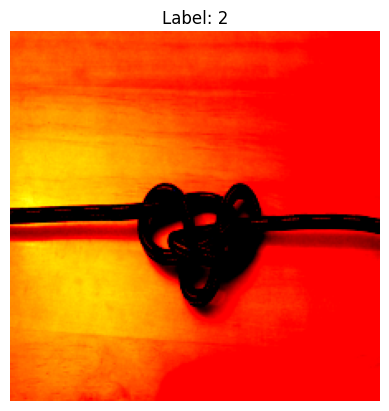

In [17]:
import matplotlib.pyplot as plt

image, label = train_dataset[522]
plt.imshow(image.permute(1, 2, 0))  # Convert tensor to a NumPy array and display the image
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()


# **DATA SPLIT**

In [18]:
# Define the proportions
train_size = int(0.7 * len(train_dataset))  # 70% for training
val_size = int(0.15 * len(train_dataset))  # 15% for validation
test_size = len(train_dataset) - train_size - val_size  # 15% for testing

# Split the dataset
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size, test_size])

# Create DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [ ]:
# Define the path to your model file
model_path = '/content/drive/MyDrive/model3.pth'

# Assuming you've already defined the architecture of model3
# Load the model weights from the .pth file
model3 = torch.load(model_path, map_location=device)





              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       1.00      0.62      0.77         8
           2       0.57      1.00      0.73         4
           3       0.40      0.33      0.36         6
           4       0.71      0.62      0.67         8
           5       0.75      0.75      0.75         8
           6       0.60      0.60      0.60         5
           7       0.86      1.00      0.92        12
           8       1.00      0.71      0.83         7
           9       0.67      0.40      0.50        10
          10       0.78      1.00      0.88         7
          11       0.60      0.75      0.67         8
          12       1.00      0.25      0.40         8
          13       1.00      1.00      1.00         5
          14       0.45      1.00      0.62         5
          15       1.00      1.00      1.00         7
          16       0.80      1.00      0.89         8
          17       1.00    

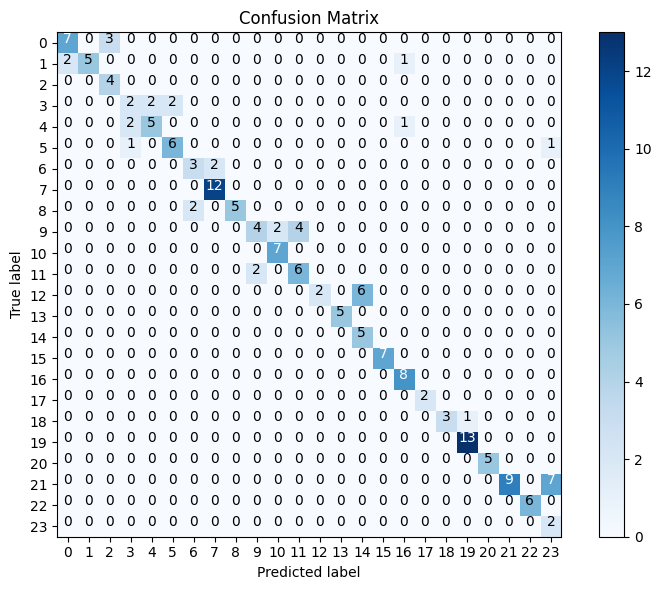

In [ ]:
import torch
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Assuming you've already defined and loaded your model, and set up your DataLoaders

# Ensure the model is in evaluation mode and move it to the appropriate device
model3.eval()
model3 = model3.to(device)

# Lists to store true labels and model predictions
all_labels = []
all_predictions = []

# Evaluate the model on the test set
with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Generate and print the classification report
report = classification_report(all_labels, all_predictions)
print(report)

# Plotting the confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(all_labels)))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Displaying the values in the confusion matrix
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


test protype 2

In [19]:
# Define a mapping from combined labels to flat model labels
combined_to_flat_labels = {
    "0_0": 0,  # alpinebutterfly_loose
    "0_1": 1,  # alpinebutterfly_tight
    "0_2": 2,  # alpinebutterfly_very_loose
    "1_0": 3,  # bowline_loose
    "1_1": 4,  # bowline_tight
    "1_2": 5,  # bowline_very_loose
    "2_0": 6,  # clove_hitch_loose
    "2_1": 7,  # clove_hitch_tight
    "2_2": 8,  # clove_hitch_very_loose
    "3_0": 9,  # fisherman's_loose
    "3_1": 10, # fisherman's_tight
    "3_2": 11, # fisherman's_very_loose
    "4_0": 12, # flemishbend_loose
    "4_1": 13, # flemishbend_tight
    "4_2": 14, # flemishbend_very_loose
    "5_0": 15, # overhandknot_loose
    "5_1": 16, # overhandknot_tight
    "5_2": 17, # overhandknot_very_loose
    "6_0": 18, # reefknot_loose
    "6_1": 19, # reefknot_tight
    "6_2": 20, # reefknot_very_loose
    "7_0": 21, # slipknot_loose
    "7_1": 22, # slipknot_tight
    "7_2": 23  # slipknot_very_loose
}


In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [24]:
from PIL import Image
import torch
import torchvision
from torchvision.transforms import ToTensor
from torchvision.models import mobilenet_v2
from torch import nn
from google.colab import files, drive
import IPython.display as display
from sklearn.metrics import precision_score, recall_score, f1_score

# Class names for knot types and tensions
class_names = {
    0: "alpinebuttefly knot",
    1: "bowline",
    2: "clove_hitch",
    3: "fisherman's",
    4: "flemishbend",
    5: "overhandknot",
    6: "reefknot",
    7: "slipknot"
}

class_names_tension = {
    0: "loose",
    1: "tight",
    2: "very loose"
}

def preprocess_image(image):
    image = image.resize((224, 224))
    image = image.convert("RGB")
    return image

# Load the entire models
model1_path = '/content/drive/MyDrive/2_model3_full.pth'
model1 = torch.load(model1_path, map_location=device)

def predict_image(image):
    preprocessed_image = preprocess_image(image)
    input_tensor = ToTensor()(preprocessed_image)
    input_tensor = input_tensor.unsqueeze(0)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model1.to(device)
    input_tensor = input_tensor.to(device)
    model1.eval()
    with torch.no_grad():
        output = model1(input_tensor)
    _, predicted_idx = torch.max(output, 1)
    knot_type = class_names[predicted_idx.item()]

    # Load the appropriate tension model based on the predicted label
    model2_path = f'/content/drive/MyDrive/3.{predicted_idx.item() + 1}_model3_full.pth'
    model2 = torch.load(model2_path, map_location=device)
    model2.to(device)
    model2.eval()
    with torch.no_grad():
        tension_output = model2(input_tensor)
    _, tension_idx = torch.max(tension_output, 1)
    tension = class_names_tension[tension_idx.item()]

    return knot_type, tension

# Lists to store true labels and model predictions
all_true_labels = []
all_predicted_labels = []

# Evaluate the hierarchical model on the test set
with torch.no_grad():
    for images, true_labels in train_dataloader:
        images = images.to(device)

        for idx, image in enumerate(images):
            # Use the PIL library to convert the tensor back to an image
            pil_image = torchvision.transforms.ToPILImage()(image.cpu())

            # Use the predict_image function to get the knot type and tension predictions
            predicted_knot, predicted_tension = predict_image(pil_image)

            # Convert the knot type and tension predictions to their corresponding indices
            knot_idx = list(class_names.values()).index(predicted_knot)
            tension_idx = list(class_names_tension.values()).index(predicted_tension)

            # Convert the combined prediction to the flat model label using the mapping
            predicted_label = combined_to_flat_labels[f"{knot_idx}_{tension_idx}"]

            all_true_labels.append(true_labels[idx].item())
            all_predicted_labels.append(predicted_label)

# Calculate accuracy
correct_predictions = sum([1 for true, pred in zip(all_true_labels, all_predicted_labels) if true == pred])
accuracy = ((correct_predictions / len(all_true_labels)))
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate precision, recall, and F1-score
precision = precision_score(all_true_labels, all_predicted_labels, average='weighted')
recall = recall_score(all_true_labels, all_predicted_labels, average='weighted')
f1 = f1_score(all_true_labels, all_predicted_labels, average='weighted')
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


Accuracy: 92.23%
Precision: 91.16%
Recall: 91.23%
F1-Score: 89.56%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The comparative analysis between Prototype-1 and Prototype-2 offers insightful revelations about the impact of label cardinality on model performance. Prototype-2, with its hierarchical classification approach, demonstrates superior performance across all evaluation metrics, including accuracy, precision, recall, and F1 score. This is particularly impressive considering that Prototype-2 had a reduced label cardinality at each stage, as opposed to Prototype-1's combined label system with a higher cardinality of 24.

The results underscore the efficacy of a segmented classification strategy. By breaking down the classification task into manageable segments, Prototype-2 not only achieved higher accuracy but also showcased improvements in precision and recall. This suggests that training multiple specialized models, each focusing on a specific subset of the classification task, can lead to enhanced performance, even if it requires additional training efforts.

In essence, the hierarchical approach of Prototype-2 proves to be a more effective strategy for this specific classification task, emphasizing the importance of considering label cardinality and task segmentation in model design and training.